In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn>=1.0.0 in c:\users\aman\anaconda3\lib\site-packages (from yellowbrick) (1.0.2)



In [9]:
import cv2
import os
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from yellowbrick.model_selection import LearningCurve
import pickle

In [10]:
df=pd.read_csv('dataset.csv')
df

,file_name,Asana,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91
0,0_138.jpg,Chair_Pose_or_Utkatasana,0.389506,0.946678,2.194914,2.050331,1.939097,0.445831,0.502043,0.826486,...,0.643668,1.097863,1.549059,1.041951,0.492259,0.925280,0.460076,0.451873,0.077265,0.513726
1,0_154.jpg,Chair_Pose_or_Utkatasana,0.692837,1.260214,1.881379,2.512375,2.419781,0.719272,0.777658,1.225009,...,0.620426,1.824903,2.376354,0.646656,1.231709,1.757457,0.232263,0.640682,1.180744,1.777264
2,0_177.jpg,Chair_Pose_or_Utkatasana,0.887322,1.954672,1.186921,1.679302,1.931094,0.648827,0.632716,1.949515,...,0.649551,2.451059,2.770082,2.387059,1.810068,2.124065,1.780704,0.366588,0.439312,0.410047
3,0_199.jpg,Chair_Pose_or_Utkatasana,0.276714,1.056870,2.084723,1.389428,1.354239,0.391146,0.474139,1.019172,...,0.438322,0.753732,2.098751,0.572952,0.349734,1.660434,0.167359,1.369192,0.185970,1.536313
4,0_21.jpg,Chair_Pose_or_Utkatasana,0.411958,1.271727,1.869866,1.826679,1.752142,0.442937,0.521296,1.177951,...,0.839304,1.564139,2.052988,0.766055,0.755102,1.215840,0.189067,0.573844,0.798116,1.319497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2_36.jpg,Warrior_I_Pose_or_Virabhadrasana_I,1.218786,1.460662,1.680931,1.238920,1.770949,1.479357,2.174576,1.385416,...,1.111876,2.600878,2.519137,1.828258,1.505265,1.409279,0.748620,0.209510,0.773262,0.732244
790,2_392.jpg,Warrior_I_Pose_or_Virabhadrasana_I,0.497001,1.141241,2.000351,1.720571,1.535900,1.510667,0.614971,1.249263,...,0.883272,1.344637,1.433022,0.897187,0.490409,0.565748,0.172146,0.096492,0.448390,0.539760
791,2_395.jpg,Warrior_I_Pose_or_Virabhadrasana_I,0.823285,0.571880,2.569713,2.605261,0.885270,1.870938,0.917978,0.660261,...,0.731472,1.190166,1.767229,0.866475,0.474055,1.036382,0.163400,0.586869,0.324159,0.904468
792,2_499.jpg,Warrior_I_Pose_or_Virabhadrasana_I,0.339550,1.533545,1.608047,0.903555,1.979713,1.069680,0.381763,1.452205,...,1.070232,1.882112,1.764588,0.621918,1.269353,0.712129,0.864815,0.826124,1.260450,1.359947


In [11]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,0.622615,1.537321,1.604272,1.482578,1.564094,0.937592,0.971862,1.566134,1.575459,1.954406,...,0.882070,1.446016,2.222264,1.651884,0.750505,1.736563,1.381394,1.407775,1.312467,0.764547
std,0.443746,0.723007,0.723007,0.573336,0.575149,0.638713,0.616384,0.561922,0.561922,0.584523,...,0.500103,0.779503,0.495142,0.763888,0.480272,0.845056,0.822624,0.812367,0.644362,0.492348
min,0.013139,0.105849,0.211498,0.111490,0.072207,0.034881,0.030752,0.224752,0.284791,0.062693,...,0.022986,0.016903,0.246259,0.109863,0.021576,0.031319,0.014322,0.028689,0.041060,0.011289
25%,0.289143,0.895885,0.898568,1.082441,1.193510,0.439806,0.472616,1.100328,1.057080,1.620310,...,0.490368,0.750473,1.953189,1.028167,0.366574,1.002552,0.614675,0.652725,0.827553,0.367530
50%,0.511803,1.480873,1.660719,1.438685,1.548899,0.761947,0.868341,1.522325,1.619267,2.012270,...,0.840385,1.496190,2.306067,1.621540,0.665546,1.828602,1.439107,1.462596,1.295469,0.693996
75%,0.831194,2.243025,2.245708,1.896401,1.981728,1.294078,1.344620,2.084513,2.041264,2.372300,...,1.188562,2.080278,2.566785,2.247811,1.001186,2.504893,2.085304,2.062127,1.664951,1.076043
max,2.188545,2.930095,3.035744,3.075981,3.029543,2.830753,3.031485,2.856801,2.916841,3.086751,...,2.539466,2.910158,3.111054,3.107436,2.552969,3.089208,3.061199,3.102828,3.122479,2.410239


In [12]:
asana_names=df.Asana
df.replace('Chair_Pose_or_Utkatasana','Chair Pose', inplace=True)
df.replace('Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana', 'Triangle Pose', inplace=True)
df.replace('Lord_of_the_Dance_Pose_or_Natarajasana', 'Lord of Dance Pose', inplace=True)
df.replace('Tree_Pose_or_Vrksasana', 'Tree Pose', inplace=True)
df.replace('Warrior_II_Pose_or_Virabhadrasana_II', 'Warrior II', inplace=True)
df.replace('Warrior_I_Pose_or_Virabhadrasana_I', 'Warrior I', inplace=True)

In [13]:
file_names=df.file_name
df.drop('file_name',axis=1,inplace=True)
df

,Asana,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91
0,Chair Pose,0.389506,0.946678,2.194914,2.050331,1.939097,0.445831,0.502043,0.826486,2.315107,...,0.643668,1.097863,1.549059,1.041951,0.492259,0.925280,0.460076,0.451873,0.077265,0.513726
1,Chair Pose,0.692837,1.260214,1.881379,2.512375,2.419781,0.719272,0.777658,1.225009,1.916583,...,0.620426,1.824903,2.376354,0.646656,1.231709,1.757457,0.232263,0.640682,1.180744,1.777264
2,Chair Pose,0.887322,1.954672,1.186921,1.679302,1.931094,0.648827,0.632716,1.949515,1.192078,...,0.649551,2.451059,2.770082,2.387059,1.810068,2.124065,1.780704,0.366588,0.439312,0.410047
3,Chair Pose,0.276714,1.056870,2.084723,1.389428,1.354239,0.391146,0.474139,1.019172,2.122420,...,0.438322,0.753732,2.098751,0.572952,0.349734,1.660434,0.167359,1.369192,0.185970,1.536313
4,Chair Pose,0.411958,1.271727,1.869866,1.826679,1.752142,0.442937,0.521296,1.177951,1.963642,...,0.839304,1.564139,2.052988,0.766055,0.755102,1.215840,0.189067,0.573844,0.798116,1.319497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Warrior I,1.218786,1.460662,1.680931,1.238920,1.770949,1.479357,2.174576,1.385416,1.756176,...,1.111876,2.600878,2.519137,1.828258,1.505265,1.409279,0.748620,0.209510,0.773262,0.732244
790,Warrior I,0.497001,1.141241,2.000351,1.720571,1.535900,1.510667,0.614971,1.249263,1.892329,...,0.883272,1.344637,1.433022,0.897187,0.490409,0.565748,0.172146,0.096492,0.448390,0.539760
791,Warrior I,0.823285,0.571880,2.569713,2.605261,0.885270,1.870938,0.917978,0.660261,2.481332,...,0.731472,1.190166,1.767229,0.866475,0.474055,1.036382,0.163400,0.586869,0.324159,0.904468
792,Warrior I,0.339550,1.533545,1.608047,0.903555,1.979713,1.069680,0.381763,1.452205,1.689388,...,1.070232,1.882112,1.764588,0.621918,1.269353,0.712129,0.864815,0.826124,1.260450,1.359947


C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


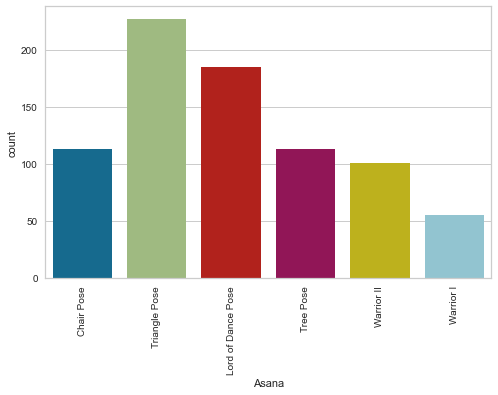

In [14]:
plt.figure(figsize=(8,5))
# plt.title("Fetal health output distribution")
plt.xlabel("Asanas")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
sb.countplot(df.Asana)
plt.show()

In [15]:
#Creating the dependent variable class
factor = pd.factorize(df['Asana'])
# df.disease = factor[0]
definitions = factor[1]
factor

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
# plt.figure(figsize=(20, 10))
# dataplot = sb.heatmap(df.corr(), cmap='PiYG', annot=True)
# plt.show()
# plt.rcParams.update({'font.size': 22})

KNeighborsClassifier
Accuracy:  0.914572864321608


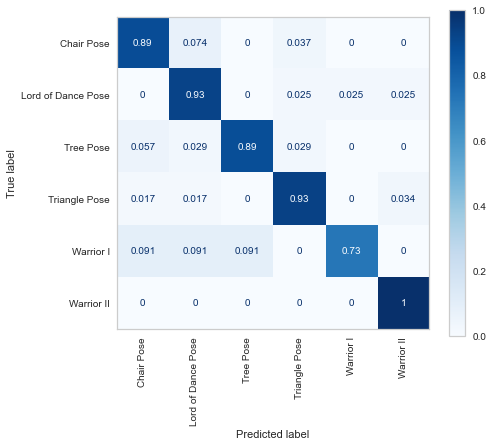


Logistic Regression
Accuracy:  0.9246231155778895


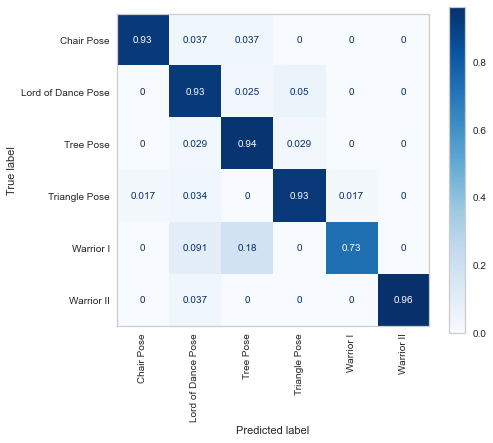


Decision Tree
Accuracy:  0.8542713567839196


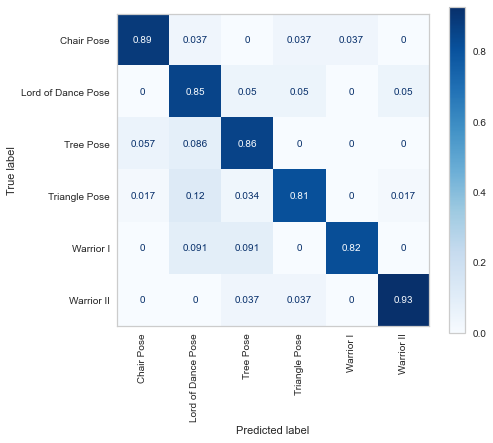


Random Forest
Accuracy:  0.9195979899497487


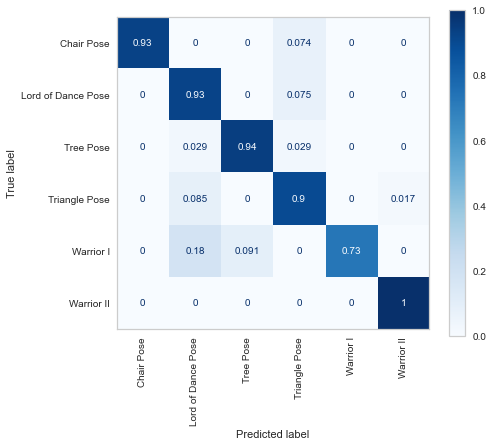


SVM
Accuracy:  0.9396984924623115


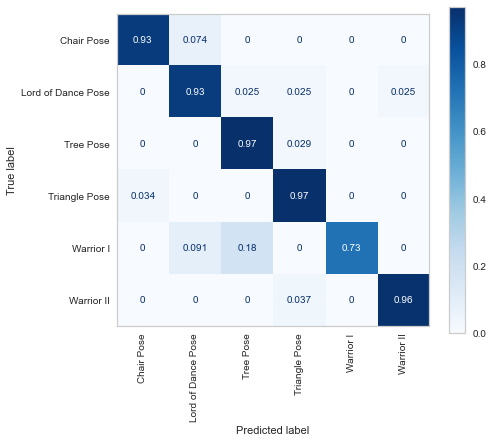


MLP
Accuracy:  0.9447236180904522


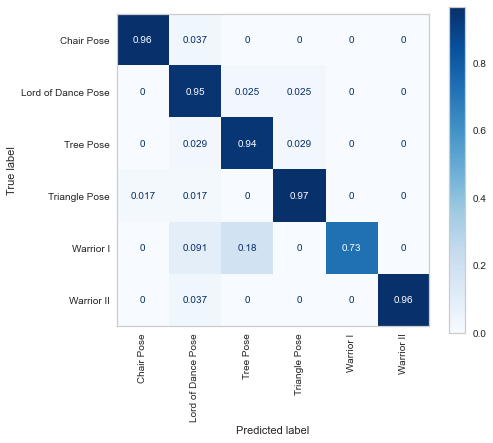

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacked: SVM and kNN
Accuracy:  0.9447236180904522


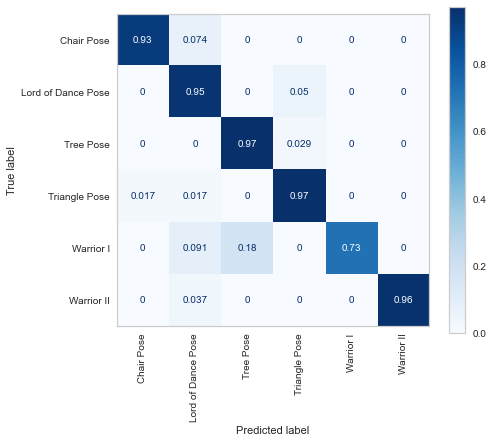

In [27]:
dataset=df
X=dataset.drop('Asana',axis=1)
y=dataset.Asana

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# Feature Scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

modelNames=['KNeighborsClassifier', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'MLP', 'Stacked: SVM and kNN']
models=[KNeighborsClassifier(),
        LogisticRegression(class_weight='balanced', max_iter=1000),
        DecisionTreeClassifier(class_weight='balanced',),
        RandomForestClassifier(class_weight='balanced', n_estimators = 200, criterion = 'gini'),
        SVC(class_weight='balanced', gamma='auto'),
        MLPClassifier(max_iter=1200)]
models.append(StackingClassifier( estimators = [('knn',models[0]),('rf',models[4])] ))
for i in range(0,len(models)):
    classifier=models[i].fit(X_train,y_train)
    print(modelNames[i])
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    
#     model = LearningCurve(classifier, scoring='accuracy')
#     model.fit(X, y)
#     model.show()
    
    fig, ax = plt.subplots(figsize=(7,6))
    plt.grid(False)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize='true', cmap='Blues', ax=ax, xticks_rotation='vertical')
    plt.show()
    print()        

In [39]:
classifier=StackingClassifier( estimators = [('knn',KNeighborsClassifier()),
                                             ('rf',RandomForestClassifier(class_weight='balanced', n_estimators = 200, criterion = 'gini'))
                                            ] ).fit(X,y)
filename = 'classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

kNN=KNeighborsClassifier().fit(X,y)
filename = 'kNN.sav'
pickle.dump(kNN, open(filename, 'wb'))

print('Models saved successfully')

Models saved successfully


Accuracy:  1.0


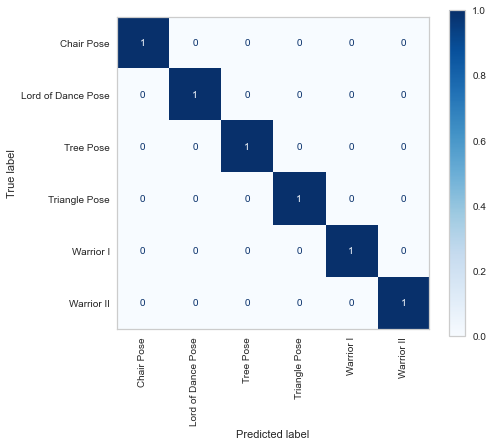

In [40]:
classifier= pickle.load(open('classifier.sav', 'rb'))
    
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

#     model = LearningCurve(classifier, scoring='accuracy')
#     model.fit(X, y)
#     model.show()

fig, ax = plt.subplots(figsize=(7,6))
plt.grid(False)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize='true', cmap='Blues', ax=ax, xticks_rotation='vertical')
plt.show()

In [80]:
clf=KNeighborsClassifier(n_neighbors=12).fit(X_train,y_train)

arr=clf.kneighbors(X=X_test.iloc[0:2], return_distance=True)
arr

(array([[2.63730342, 2.70007814, 2.80376245, 2.92675264, 3.23973079,
         3.48121995, 3.75726199, 3.87120305, 3.88556384, 3.90648273,
         3.96788028, 4.03871626],
        [3.23834278, 3.90192295, 4.00338001, 4.01085804, 4.02784426,
         4.49920098, 4.61898608, 4.62449789, 4.74931881, 4.76112772,
         4.76538034, 4.81533254]]),
 array([[ 70, 937, 621, 474, 229, 388, 875, 999, 276, 714, 685, 194],
        [211, 574, 399, 867, 827, 913, 963, 772, 989, 416, 324, 283]],
       dtype=int64))

In [81]:
X_test.iloc[0]

feature_0     0.608598
feature_1     1.665643
feature_2     0.702254
feature_3     1.800048
feature_4     1.055294
                ...   
feature_61    1.354576
feature_62    0.218964
feature_63    0.982606
feature_64    0.560963
feature_65    1.489470
Name: 1323, Length: 66, dtype: float64

In [97]:
arr[1][0][0]

70

In [83]:
X_train.iloc[arr[1][0][0]]

feature_0     0.338742
feature_1     1.669860
feature_2     1.491694
feature_3     0.794011
feature_4     0.503629
                ...   
feature_61    1.154563
feature_62    0.082700
feature_63    0.626072
feature_64    0.633622
feature_65    1.225474
Name: 1293, Length: 66, dtype: float64

In [84]:
X_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65
1323,0.608598,1.665643,0.702254,1.800048,1.055294,1.923510,1.586570,1.883148,2.417209,2.279671,...,2.620205,2.166675,1.266101,2.727390,0.542075,1.354576,0.218964,0.982606,0.560963,1.489470
867,0.718409,1.888185,0.930327,0.343185,2.477335,1.170448,1.760583,2.138231,2.439604,1.558184,...,2.381974,2.072632,1.044378,1.674489,0.311534,1.975556,1.539106,1.816807,1.535176,0.630251
1124,0.659220,1.135216,1.388928,2.129731,0.605598,0.342746,1.362839,1.961413,2.074428,1.812693,...,2.911158,2.845554,0.609542,1.576188,0.163747,2.456862,1.530549,2.302158,1.366934,0.966920
282,0.389042,0.805024,1.544683,1.694527,0.426553,1.439983,0.796124,2.210731,2.588971,0.838638,...,2.819720,2.703318,0.097253,1.522465,0.402788,2.741035,1.722727,2.612173,1.320295,1.487696
323,0.849863,1.249477,1.858392,2.292806,1.229013,1.862291,1.058776,2.707397,2.447062,1.550703,...,2.403206,2.062317,0.701709,1.529457,0.469792,2.022254,1.189450,2.011486,1.392588,0.877278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.265781,1.733134,1.192853,1.623265,2.624399,0.464759,1.777123,2.228308,1.268902,2.004256,...,1.039918,0.770086,0.803257,2.381263,1.056664,0.303160,1.767327,0.768960,1.612618,1.824883
273,1.249849,0.498365,1.935349,2.229213,2.268446,2.250882,0.706211,1.586547,0.996712,1.201802,...,2.174889,1.505777,0.520974,0.523821,0.669605,2.657574,2.654158,1.999232,1.997943,0.011508
901,1.000085,0.918681,0.891006,2.495007,0.231702,0.397573,1.329976,2.645590,2.651302,2.638729,...,2.037924,1.323203,1.559155,2.293409,0.827451,0.479853,0.400469,0.457037,0.971477,0.796955
1143,1.173208,2.692740,1.885245,1.591578,2.232167,1.671033,2.353583,1.066614,1.456213,1.619681,...,2.861775,2.473327,0.781888,1.015682,0.390169,2.583539,2.344805,2.819031,2.626286,0.238912


In [85]:
input=df[df[df.columns[1]]==X_test.iloc[0][0]]
input

,Asana,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65
1323,Warrior I,0.608598,1.665643,0.702254,1.800048,1.055294,1.92351,1.58657,1.883148,2.417209,...,2.620205,2.166675,1.266101,2.72739,0.542075,1.354576,0.218964,0.982606,0.560963,1.48947


In [86]:
df[df[df.columns[1]]==X_train.iloc[70][0]]

,Asana,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65
1293,Warrior I,0.338742,1.66986,1.491694,0.794011,0.503629,1.015597,1.646149,2.11375,2.654755,...,2.518216,1.94247,1.375691,2.575668,0.57852,1.154563,0.0827,0.626072,0.633622,1.225474


In [87]:
df.iloc[70]

Asana         Chair Pose
feature_0       0.491326
feature_1       1.707336
feature_2       1.402971
feature_3       1.481771
                 ...    
feature_61      1.418614
feature_62      0.351518
feature_63      0.277524
feature_64       0.81379
feature_65      1.086283
Name: 70, Length: 67, dtype: object

In [88]:
print(file_names[1323],asana_names[1323])

1_42.jpg Warrior_I_Pose_or_Virabhadrasana_I


In [89]:
print(file_names[1293],asana_names[1293])

1_19.jpg Warrior_I_Pose_or_Virabhadrasana_I


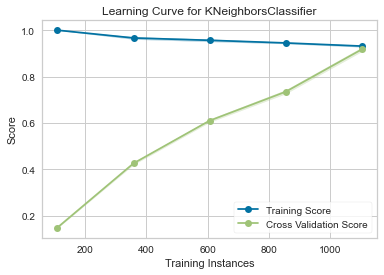

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [90]:
model = LearningCurve(clf, scoring='accuracy')
model.fit(X, y)
model.show()

In [91]:
model.predict(X)

array(['Chair Pose', 'Chair Pose', 'Chair Pose', ..., 'Warrior I',
       'Warrior I', 'Warrior I'], dtype=object)